# Plot lfp traces

**Regression-testing** [05.07.2023]: 
- probe location: ok
- single channel lfp figure: ok

# Setup

Activate `npx_10m_384ch_unit_classes` venv

In [1]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pprint as pp
import pandas as pd
import yaml
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as spost
from probeinterface.plotting import plot_probe
from spikeinterface.comparison import GroundTruthStudy
import shutil
from datetime import datetime

pd.set_option('display.max_colwidth', None)

# SET PATHS
# PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023/spike-sorting"
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"

os.chdir(PROJ_PATH)
from src.nodes.io.loading import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.io import loading_raw_recording
from src.nodes.prepro import preprocess
from src.nodes.utils import get_config, write_metadata
from src.nodes.postpro import waveform
from src.nodes.dataeng.silico import recording

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"    # specifies the experiment 
SIMULATION_DATE = "2023_02_19" # specifies the run (date)


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SET CONFIG PATHS
# STUDY_FOLDER = data_conf["sorting"]["simulation"]["study"]["output"]


# set output figure paths
# FIG_PATH = data_conf["figures"]["silico"]["lfp_traces"]

data_conf["preprocessing"]

2023-07-10 11:44:24,905 - root - utils.py - get_config - INFO - Reading experiment config.
2023-07-10 11:44:24,936 - root - utils.py - get_config - INFO - Reading experiment config. - done


{'output': {'trace_file_path': '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/preprocessed/traces.pkl',
  'spike_file_path': '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/preprocessed/spiketrains.pkl'}}

# Check raw lfp traces

In [2]:
# cast as SI extractor
Recording = recording.run(data_conf)
# recording.write(Recording, data_conf)

# preprocess
Preprocessed = preprocess.run(data_conf, param_conf)

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-07-10 11:44:56,246 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting raw traces as SpikeInterface Recording object ...


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-07-10 11:45:24,237 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting as raw traces as SpikeInterface Recording object - done in 28.0
2023-07-10 11:45:24,238 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe ...


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-07-10 11:46:00,971 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe - done in 36.7
2023-07-10 11:46:00,973 - root - probe_wiring.py - run_neuropixels_32 - INFO - wiring neuropixels-32 probe to recording - done
write_binary_recording with n_jobs = 1 and chunk_size = None


In [3]:
# sanity check that recording is preprocessed
Preprocessed.is_filtered()

True

### Plot all 32 channels

In [4]:
# load the preprocessed lfp recording
trace = loading_raw_recording.load(data_conf)

In [5]:
# inspect object
print(f"\ntrace type: \n {type(trace)}\n")
print(f"trace attributes: \n")
print(dir(trace))

# inspect the raw lfp recording
duration = trace.get_total_duration()
print(f"trace recording duration: {duration} secs\n")
print(f"channel (count)\n: {trace.get_num_channels()} channels\n")
print("channel 2D locations:\n") 
print(trace.get_channel_locations())


trace type: 
 <class 'spikeinterface.core.binaryfolder.BinaryFolderRecording'>

trace attributes: 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_bin_kwargs', '_channel_slice', '_check_segment_index', '_dtype', '_extra_metadata_from_folder', '_extra_metadata_to_folder', '_features', '_frame_slice', '_get_file_path', '_kwargs', '_main_annotations', '_main_features', '_main_ids', '_main_properties', '_preferred_mp_context', '_properties', '_recording_segments', '_remove_channels', '_sampling_frequency', '_save', '_select_segments', 'add_recording_segment', 'annotate', 'binary_compatible_with', 'channel_ids', 'channel_slice', 'check_if_dumpable', 'clear_channel_groups', 'clear

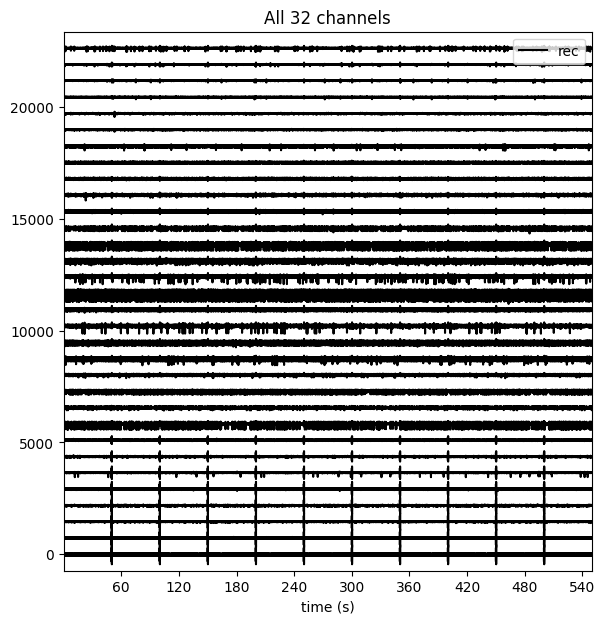

In [6]:
CHANNEL_IDS = np.arange(0,32,1)

# Show example of the traces recorded from the five first channels
fig = plt.figure(figsize=(15,7));
spec = fig.add_gridspec(3, 2);

ax1 = fig.add_subplot(spec[:, 0]);
sw.plot_timeseries(trace, channel_ids = CHANNEL_IDS, time_range = (0,duration), ax=ax1);
ax1.set_title("All 32 channels");
ax1.set_xlabel("time (s)");

We can compare it at scale to `Hagen et al., (2015), Journal of Neuroscience Methods` traces in the mouse's visual cortex.


note: BlueConfig indicates that lfp trace unit is in mV

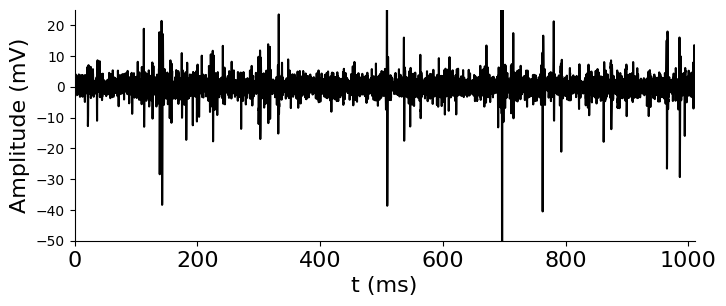

In [8]:
# Show example of the traces recorded from the five first channels
fig = plt.figure(figsize=(8,3));
DURATION = 1.01

ax3 = fig.add_subplot(1,1,1);
CHANNEL_IDS = [10]
sw.plot_timeseries(trace, channel_ids = CHANNEL_IDS, time_range = (DURATION,2*DURATION), ax=ax3);
ax3.set_xlabel("t (ms)", fontsize=16);
ax3.set_ylabel("Amplitude (mV)", fontsize=16);
ax3.set_xticks(np.arange(DURATION,2*DURATION,0.2));
ax3.set_xticklabels(np.arange(0,DURATION*1000,200).astype(int), fontsize=16);
ax3.spines[['right','top']].set_visible(False)
ax3.set_ylim([-50, 25])
ax3.get_legend().remove()

# SAVE FIGURE
plt.savefig("figures/npx_10m_32ch_single_channel_lfp.pdf")

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 